<a href="https://colab.research.google.com/github/water200427/interpolation/blob/main/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 新增 Microsoft Excel 工作表 (2).xlsx to 新增 Microsoft Excel 工作表 (2).xlsx


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

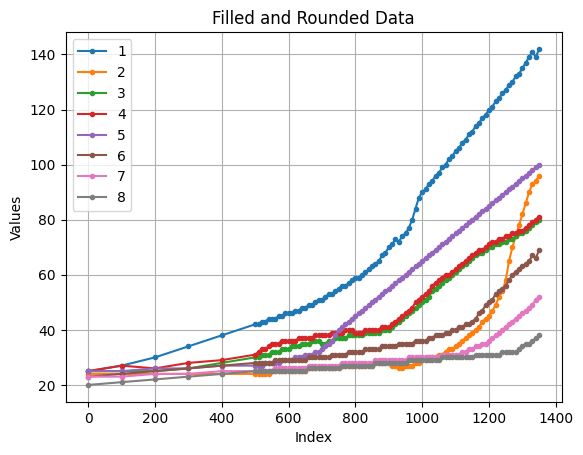

In [1]:
# 安裝所需的庫
!pip install pandas numpy matplotlib openpyxl

# 導入所需的庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 向下填充，依據最前面有的數值
def fill_down_first(df):
    return df.ffill()

# 向下填充，依據最後有的數值
def fill_down_last(df):
    return df.bfill()

# 線性插值填充
def linear_interpolation(df):
    return df.interpolate(method='linear')

# 二次逼近插值填充
def quadratic_interpolation(df):
    return df.apply(lambda col: col.interpolate(method='polynomial', order=2))

# 指數插值填充
def exponential_interpolation(df):
    return df.apply(lambda col: np.exp(np.log(col).interpolate(method='linear')))

# 整數處理
def round_values(df, method):
    if method == 'floor':
        return df.applymap(np.floor)
    elif method == 'ceil':
        return df.applymap(np.ceil)
    elif method == 'round':
        return df.round()
    else:
        raise ValueError("Unknown rounding method")

# 繪製圖表
def plot_data(df, title):
    df.plot(kind='line', marker='.', x="--")
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# 主函數
def main():
    # 讀取Excel表格
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_excel(next(iter(uploaded.keys())))

    # 選擇填充方式
    fill_method = 'exponential'  # 可選 'first', 'last', 'linear', 'exponential', 'quadratic'
    rounding_method = 'round'  # 可選 'floor', 'ceil', 'round', 'none'

    if fill_method == 'first':
        df_filled = fill_down_first(df)
    elif fill_method == 'last':
        df_filled = fill_down_last(df)
    elif fill_method == 'linear':
        df_filled = linear_interpolation(df)
    elif fill_method == 'exponential':
        df_filled = exponential_interpolation(df)
    elif fill_method == 'quadratic':
        df_filled = quadratic_interpolation(df)
    else:
        raise ValueError("Unknown fill method")

    # 對數值進行整數處理
    if rounding_method != 'none':
        df_filled = round_values(df_filled, rounding_method)

    # 將結果寫回Excel表格
    df_filled.to_excel('filled_excel_file.xlsx', index=False)
    files.download('filled_excel_file.xlsx')

    # 繪製圖表
    plot_data(df_filled, 'Filled and Rounded Data')

# 運行主函數
main()